## **About the Dataset**

The dataset to be used in this webinar is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `host_name`: Name of host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `Listing added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays thus far


## **Getting started**

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [4]:
# Read in the dataset
df = pd.read_csv('C:/Users/Josh Peralta/Documents/Josh/Google Drive/PSMDS/2nd Semester 2022/Data Mining/Datasets/airbnb.csv', index_col = 'Unnamed: 0')
df

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


## **Diagnosing data cleaning problems using simple `pandas`** 

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following: 

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column


In [5]:
# Print the header of the DataFrame
df.head(10)

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
5,271954,Beautiful brownstone apartment,1423798,Aj,"Manhattan, Greenwich Village","(40.73388, -73.99452)",Entire home/apt,150$,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15
6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,"Manhattan, Harlem","(40.8309, -73.94308000000002)",Entire home/apt,200$,0,NaN,NaN,219,NaN,NaN,NaN,2018-05-05
7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,"Brooklyn, Sheepshead Bay","(40.58531, -73.93811)",Entire home/apt,224$,2,2018-06-22,0.08,353,4.091228,2.4,0.690393,2017-12-17
8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,"Manhattan, Theater District","(40.761, -73.98522)",Entire home/apt,169$,5,2017-06-25,0.15,365,3.562947,6.0,0.704538,2016-12-20
9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,"Manhattan, Harlem","(40.80667, -73.95182)",Entire home/apt,75$,8,2019-04-24,0.66,9,4.695769,9.6,0.750073,2018-10-19


In [6]:
df.tail(10)

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
10009,1474752,Dope Williamsburg Apartment,2259113,Ange,"Brooklyn, Williamsburg","(40.71215, -73.95636999999998)",Private room,NaN,23,2019-05-06,0.32,159,3.962641,27.6,0.734784,2018-10-31
10010,22016391,Your own Loft/gallery in Bushwick!,43872938,Shir,"Brooklyn, Bushwick","(40.69264, -73.90485)",Private room,NaN,3,2018-04-09,0.17,0,3.472408,3.6,0.633199,2017-10-04
10011,165461,Couldn't Be Closer To Columbia Uni2,867225,Rahul,"Manhattan, Morningside Heights","(40.80525, -73.95916)",Private room,75$,57,2019-01-01,0.59,201,3.272092,68.4,0.679913,2018-06-28
10012,397420,New York Host who knows The Most,1985717,Darktalia,"Manhattan, Harlem","(40.82703, -73.94311)",Private room,85$,6,2017-09-05,0.07,363,3.927216,7.2,0.609333,2017-03-02
10013,23979192,"Huge, bright 1 bed w/ priv yard in Crown Heights!",15538912,Michelle,"Brooklyn, Crown Heights","(40.67395, -73.94874)",Entire home/apt,77$,3,2018-09-23,0.20,0,4.719189,3.6,0.608461,2018-03-20
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25
10018,32876011,Private room in a perfect location in the city,59583716,Shai,"Manhattan, Upper East Side","(40.76174, -73.96625)",Private room,90$,1,2019-03-12,0.25,8,4.069096,1.2,0.720249,2018-09-06


By merely looking at the data, we can already diagnose a range of potential problems down the line such as:

<br>

### _1. Data type problems:_

- **Problem 1**: We can see that the `coordinates` column is probably a string (`str`) - most mapping functions require a latitude input, and longitude input, so it's best to split this column into two and convert the values to `float`.
- **Problem 2**: Similar to `coordinates` - the `price` column also is a string with `$` attached to each price point, we need to convert that to `float` if we want a good understanding of the dataset. 
- **Problem 3**: We need to make sure date columns (`last_review` and `listing_added`) are in `datetime` to allow easier manipulation of data data.

<br>

_Missing data problems:_

- **Problem 4**: We can see that there are missing data in some columns, we'll get a better bird's eye view of that down the line.

<br>

_Text/categorical data problems:_


- **Problem 5**: To be able to visualize number of listings by boroughs - we need to separate neighborhoud name from borough name in `neighbourhood_full` column.
- **Problem 6**: Looking at `room_type`, let's replace those values to make them `'Shared Room'`, `'Private Home/Apartment'`, `'Private Room'` and `'Hotel Room'`.

In [7]:
# Print data types of DataFrame
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

Printing the data types confirms that `coordinates` and `price` need to be converted to `float`, and date columns need to be converted to `datetime` _(**problems 1,2 3)**_

In [8]:
# Print info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

Printing the info confirms our hunch about the following:

- There is missing data in the `price`, `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, `5_stars` columns. It also seems that the missingness of `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, `5_stars` are related since they have the same amount of missing data. We will confirm later with `missingno` _(**problem 4**)_.

In [9]:
# Print number of missing values
df.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

In [10]:
# Print description of DataFrame
df.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339




- **Problem 7:** Looking at the maximum of the `rating` column - we see that it is out of range of `5` which is the maximum rating possible. We need to make sure we fix the range this column.

It's worth noting that `.describe()` does not offer a bird's eye view of all the out of range data we have, for example, what if we have date data in the future? Or given our dataset, `listing_added` dates that are in the future of `last_review` dates? 

In [11]:
df[df.rating>5].rating 

1925    5.017040
6732    5.087091
8821    5.181114
Name: rating, dtype: float64

#### Use .iloc and other means to replace the out of bounds ratings

In [8]:
# Find number of unique values in room_type column
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

- **Problem 8**: There are trailing spaces and capitalization issues with `room_type`, we need to fix this problem.

In [12]:
# How many values of different room_types do we have?
df['room_type'].value_counts()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: room_type, dtype: int64

### **2. Our to do list:**

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

<br>

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

<br>

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values

<br>

_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns. 

<br>

_Is that all though?_

- We need to investigate if we duplicates in our data
- We need to make sure that data makes sense by applying some sanity checks on our DataFrame 

## **Q&A**

## **Cleaning data** 

### Data type problems

In [10]:
# Reminder of the DataFrame
df.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


##### **Task 1:** Replace `coordinates` with `latitude` and `longitude` columns

To perform this task, we will use the following methods:

- `.str.replace("","")` replaces one string in each row of a column with another
- `.str.split("")` takes in a string and lets you split a column into two based on that string
- `.astype()` lets you convert a column from one type to another

In [82]:
# Remove "(" and ")" from coordinates
df['coordinates'] = df['coordinates'].str.replace("(","")
df['coordinates'] = df['coordinates'].str.replace(")","")
# Print the header of the column
df['coordinates'].head()

<ipython-input-82-958e8841765d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['coordinates'] = df['coordinates'].str.replace("(","")
<ipython-input-82-958e8841765d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['coordinates'] = df['coordinates'].str.replace(")","")


0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [83]:
# Split column into two
lat_long = df['coordinates'].str.split(",", expand = True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [13]:
# Assign correct columns to latitude and longitude columns
df['latitude'] = lat_long[0]
df['longitude'] = lat_long[1]
# Print the header and confirm new column creation
df.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [14]:
# Print out dtypes again
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [15]:
# Convert latitude and longitude to float
df['latitude'] = df['latitude'].astype('float')
df['longitude'] = df['longitude'].astype('float')
# Print dtypes again
df.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [16]:
# Drop coordinates column
df.drop('coordinates', axis = 1, inplace = True)

##### **Task 2:** Remove `$` from `price` and convert it to `float`

To perform this task, we will be using the following methods:

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()`

In [84]:
# Calculate mean of price without conversion
df['price'].mean()

TypeError: can only concatenate str (not "int") to str

In [195]:
# Remove $ from price before conversion to float
df['price'] = df['price'].str.strip("$")
# Print header to make sure change was done
df['price'].head()

AttributeError: Can only use .str accessor with string values!

In [196]:
# Convert price to float
df['price'] = df['price'].astype('float')
# Calculate mean of price after conversion
df['price'].mean()

150.90512217564665

##### **Task 3:** Convert `listing_added` and `last_review` columns to `datetime`

To perform this task, we will use the following functions:

- `pd.to_datetime(format = "")`
  - `format` takes in the desired date format `"%Y-%m-%d"`

In [197]:
# Print header of two columns
df[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [198]:
# Convert both columns to datetime
df['listing_added'] = pd.to_datetime(df['listing_added'], format = '%Y-%m-%d')
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')

In [203]:
# Print header and datatypes of both columns again
print(df[['listing_added', 'last_review']].head())
print(df[['listing_added', 'last_review']].dtypes)

  listing_added last_review
0    2018-06-08  2018-12-12
1    2018-12-25  2019-06-30
2    2018-08-15         NaT
3    2017-03-20  2017-09-23
4    2020-10-23  2019-06-12
listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


### Text and categorical data problems

##### **Task 4:** We need to collapse `room_type` into correct categories

To perform this task, we will be using the following methods:

- `.str.lower()` to lowercase all rows in a string column
- `.str.strip()` to remove all white spaces of each row in a string column
- `.replace()` to replace values in a column with another

In [204]:
# Print unique values of `room_type`
df['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [205]:
# Deal with capitalized values
df['room_type'] = df['room_type'].str.lower()
df['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [206]:
# Deal with trailing spaces
df['room_type'] = df['room_type'].str.strip()
df['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [207]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
mappings = {'private room': 'Private Room', 
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'entire place': 'Entire place'}

# Replace values and collapse data
df['room_type'] = df['room_type'].replace(mappings)
df['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room', 'home'],
      dtype=object)

##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [98]:
# Print header of column
df['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [99]:
# Split neighbourhood_full
borough_neighbourhood = df['neighbourhood_full'].str.split(",", expand = True)
borough_neighbourhood.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [172]:
# Create borough and neighbourhood columns
df['borough'] = borough_neighbourhood[0]
df['neighbourhood'] = borough_neighbourhood[1]
# Print header of columns
df[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Brooklyn, Brooklyn Heights",Brooklyn,Brooklyn Heights
3,"Manhattan, Upper West Side",Manhattan,Upper West Side
4,"Manhattan, Lower East Side",Manhattan,Lower East Side


In [173]:
# Drop neighbourhood_full column
df.drop('neighbourhood_full', axis = 1, inplace = True)

In [174]:
# Print out unique values of borough and neighbourhood
print(df['borough'].unique())
print(df['neighbourhood'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
[' Flatlands' ' Upper West Side' ' Brooklyn Heights' ' Lower East Side'
 ' Greenwich Village' ' Harlem' ' Sheepshead Bay' ' Theater District'
 ' Bushwick' ' Laurelton' ' Mott Haven' ' Flushing' ' Crown Heights'
 ' Midtown' ' Financial District' ' East Village' ' Park Slope'
 ' Washington Heights' ' Williamsburg' ' Chelsea' ' Bedford-Stuyvesant'
 ' Gowanus' ' Upper East Side' ' Ditmars Steinway' ' Cypress Hills'
 " Hell's Kitchen" ' Ridgewood' ' Marble Hill' ' Kips Bay'
 ' Prospect Heights' ' East New York' ' Concord' ' Stapleton' ' Astoria'
 ' East Harlem' ' Sunnyside' ' Gramercy' ' Prospect-Lefferts Gardens'
 ' Sunset Park' ' Forest Hills' ' Windsor Terrace' ' Clinton Hill'
 ' Murray Hill' ' Flatiron District' ' Greenpoint' ' East Flatbush'
 ' Tribeca' ' Woodhaven' ' Fort Greene' ' Inwood' ' Chinatown'
 ' Rockaway Beach' ' Woodside' ' Bayside' ' Bensonhurst' ' SoHo'
 ' Red Hook' ' West Village' ' South Slope' ' Richmond Hill' '

In [175]:
# Strip white space from neighbourhood column
df['neighbourhood'] = df['neighbourhood'].str.strip()
# Print unique values again
print(df['neighbourhood'].unique())

['Flatlands' 'Upper West Side' 'Brooklyn Heights' 'Lower East Side'
 'Greenwich Village' 'Harlem' 'Sheepshead Bay' 'Theater District'
 'Bushwick' 'Laurelton' 'Mott Haven' 'Flushing' 'Crown Heights' 'Midtown'
 'Financial District' 'East Village' 'Park Slope' 'Washington Heights'
 'Williamsburg' 'Chelsea' 'Bedford-Stuyvesant' 'Gowanus' 'Upper East Side'
 'Ditmars Steinway' 'Cypress Hills' "Hell's Kitchen" 'Ridgewood'
 'Marble Hill' 'Kips Bay' 'Prospect Heights' 'East New York' 'Concord'
 'Stapleton' 'Astoria' 'East Harlem' 'Sunnyside' 'Gramercy'
 'Prospect-Lefferts Gardens' 'Sunset Park' 'Forest Hills'
 'Windsor Terrace' 'Clinton Hill' 'Murray Hill' 'Flatiron District'
 'Greenpoint' 'East Flatbush' 'Tribeca' 'Woodhaven' 'Fort Greene' 'Inwood'
 'Chinatown' 'Rockaway Beach' 'Woodside' 'Bayside' 'Bensonhurst' 'SoHo'
 'Red Hook' 'West Village' 'South Slope' 'Richmond Hill' 'Jamaica'
 'Boerum Hill' 'St. George' 'Clason Point' 'College Point' 'Vinegar Hill'
 'Rego Park' 'East Elmhurst' 'Kensin

##### **Task 6:** Make sure we set the correct maximum for `rating` column out of range values

In [103]:
# Isolate rows of rating > 5.0
df[df['rating'] > 5.0]

,listing_id,name,host_id,host_name,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,borough,neighbourhood
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,"40.71825, -73.99019",Entire place,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,"40.69551, -73.93951",Private Room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,"40.69827, -73.99649000000002",Entire place,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,Brooklyn,Brooklyn Heights


In [104]:
# Drop these rows and make sure we have effected changes
df.drop(df[df['rating'] > 5.0].index, inplace = True)

In [105]:
# Get the maximum
df['rating'].max()

4.999561104773598

## **Q&A**

### Dealing with missing data

In [36]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
df[df['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0.0,2075.000000,0.0,0.0,0.0,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaN,104.531566,NaN,NaN,NaN,40.732074,-73.956771
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,138.266525,NaN,NaN,NaN,0.051168,0.041065
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaN,7.000000,NaN,NaN,NaN,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaN,211.000000,NaN,NaN,NaN,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaN,365.000000,NaN,NaN,NaN,40.911690,-73.727310


In [37]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
df[~df['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,7.941000e+03,7.941000e+03,7750.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000
mean,1.836419e+07,6.474110e+07,140.230581,28.336482,1.353901,114.320111,4.014050,34.003778,0.718540,40.728335,-73.950632
std,1.068788e+07,7.606089e+07,163.630337,46.746949,1.615659,129.789313,0.574787,56.096338,0.079927,0.055491,0.047017
min,3.831000e+03,2.787000e+03,0.000000,1.000000,0.010000,0.000000,3.000633,1.200000,0.600026,40.508680,-74.239860
25%,8.964308e+06,7.138163e+06,69.000000,3.000000,0.200000,0.000000,3.519751,3.600000,0.655573,40.688560,-73.982130
50%,1.927436e+07,2.947846e+07,105.000000,9.000000,0.700000,54.000000,4.027415,10.800000,0.709747,40.721820,-73.954410
75%,2.787660e+07,1.016578e+08,170.000000,32.000000,2.000000,229.000000,4.515626,38.400000,0.763948,40.763390,-73.934930
max,3.635113e+07,2.733615e+08,8000.000000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280


Looking at the missing data in the DataFrame - we can see that `number_of_reviews` across all missing rows is 0. We can infer that these listings have never been visited - hence could be inferred they're inactive/have never been visited. 

We can impute them as following:

- Set `NaN` for `reviews_per_month`, `number_of_stays`, `5_stars` to 0.
- Since a `rating` did not happen, let's keep the column as is - but create a new column named `rated` that takes in `1` if yes, `0` if no.
- We will also leave `last_review` as is.


In [38]:
# Impute missing data
df = df.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})

# Create is_rated column
is_rated = np.where(df['rating'].isna() == True, 0, 1)
df['is_rated'] = is_rated

**Treating the** `price` **column**

In [106]:
# Investigate DataFrame with missing values in price
df[df['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,2.380000e+02,2.380000e+02,0.0,238.000000,191.000000,238.000000,191.000000,191.000000,191.000000
mean,1.805656e+07,6.262965e+07,NaN,22.445378,1.392565,98.953782,4.078343,33.562304,0.719882
std,1.065176e+07,7.518785e+07,NaN,35.798003,1.754495,125.872256,0.568705,45.587517,0.084852
min,8.092400e+04,1.145900e+05,NaN,0.000000,0.020000,0.000000,3.007359,1.200000,0.600317
25%,8.282298e+06,6.034050e+06,NaN,1.000000,0.195000,0.000000,3.646496,3.600000,0.659520
50%,1.863600e+07,2.809524e+07,NaN,6.000000,0.590000,23.000000,4.149203,13.200000,0.701724
75%,2.753759e+07,1.009006e+08,NaN,26.000000,2.015000,192.000000,4.538671,44.400000,0.763544
max,3.638875e+07,2.668265e+08,NaN,207.000000,8.870000,365.000000,4.957646,248.400000,0.934979


In [40]:
# Investigate DataFrame with missing values in price
df[~df['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,9.778000e+03,9.778000e+03,9778.00000,9778.000000,9778.000000,9778.000000,7750.000000,9778.000000,9778.000000,9778.000000,9778.000000,9778.000000
mean,1.930078e+07,6.807826e+07,150.87523,22.466558,1.072341,112.616895,4.012465,26.959869,0.569485,40.729154,-73.952046,0.792596
std,1.095415e+07,7.869506e+07,205.86666,43.344327,1.536549,131.769744,0.574882,52.013192,0.299870,0.054575,0.045837,0.405468
min,3.831000e+03,2.787000e+03,0.00000,0.000000,0.000000,0.000000,3.000633,0.000000,0.000000,40.508680,-74.239860,0.000000
25%,9.696668e+06,7.952219e+06,69.00000,1.000000,0.040000,0.000000,3.518948,1.200000,0.611644,40.689912,-73.983030,1.000000
50%,2.012299e+07,3.167018e+07,106.00000,5.000000,0.375000,44.500000,4.024327,6.000000,0.681882,40.723095,-73.955580,1.000000
75%,2.938694e+07,1.074344e+08,180.00000,22.000000,1.550000,227.750000,4.514427,26.400000,0.750110,40.763438,-73.936217,1.000000
max,3.648724e+07,2.741034e+08,8000.00000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280,1.000000


In [41]:
# Get median price per room_type
df.groupby('room_type').median()['price']

room_type
Entire place    163.0
Private Room     70.0
Shared room      50.0
Name: price, dtype: float64

In [42]:
# Impute price based on conditions
df.loc[(df['price'].isna()) & (df['room_type'] == 'Entire place'), 'price'] = 163.0
df.loc[(df['price'].isna()) & (df['room_type'] == 'Private Room'), 'price'] = 70.0
df.loc[(df['price'].isna()) & (df['room_type'] == 'Shared Room'), 'price'] = 50.0

In [43]:
# Confirm price has been imputed
df.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                   7
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
is_rated                0
dtype: int64

### What's still to be done?

##### **Task 8:** Let's deal with duplicate data


There are two notable types of duplicate data:

- Identical duplicate data across all columns
- Identical duplicate data cross most or some columns

To diagnose, and deal with duplicate data, we will be using the following methods and functions:

- `.duplicated(subset = , keep = )`
  - `subset` lets us pick one or more columns with duplicate values.
  - `keep` returns lets us return all instances of duplicate values.
- `.drop_duplicates(subset = , keep = )`
  

In [109]:
# Print the header of the DataFrame again
df.head()

,listing_id,name,host_id,host_name,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,borough,neighbourhood
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"40.63222, -73.93398",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"40.78761, -73.96862",Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"40.7007, -73.99517",Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,"40.79169, -73.97498",Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"40.71884, -73.98354",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,Manhattan,Lower East Side


In [110]:
# Find duplicates
duplicates = df.duplicated(subset = 'listing_id', keep = False)
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
10014    False
10015    False
10016    False
10017    False
10018    False
Length: 10016, dtype: bool


In [111]:
# Find duplicates
df[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,borough,neighbourhood
1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,"40.73652, -73.95236",Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,Brooklyn,Greenpoint
6562,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,"40.73652, -73.95236",Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,Brooklyn,Greenpoint
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,"40.71257, -73.96149",Entire place,245.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-08-09,Brooklyn,Williamsburg
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,"40.71257, -73.96149",Entire place,250.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-05-24,Brooklyn,Williamsburg
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,"40.69496, -73.93949",Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,Brooklyn,Bedford-Stuyvesant
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,"40.69496, -73.93949",Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,Brooklyn,Bedford-Stuyvesant
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,"40.73813, -73.98098",Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,Manhattan,Kips Bay
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,"40.73813, -73.98098",Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,Manhattan,Kips Bay
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,"40.66086, -73.96159",Entire place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,Brooklyn,Prospect-Lefferts Gardens
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,"40.66086, -73.96159",Entire place,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,Brooklyn,Prospect-Lefferts Gardens


In [112]:
# Remove identical duplicates
df = df.drop_duplicates()

In [113]:
# Find non-identical duplicates
duplicates = df.duplicated(subset = 'listing_id', keep = False)

In [114]:
# Show all duplicates
df[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,borough,neighbourhood
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,"40.71257, -73.96149",Entire place,250.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-05-24,Brooklyn,Williamsburg
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,"40.71257, -73.96149",Entire place,245.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-08-09,Brooklyn,Williamsburg
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,"40.69496, -73.93949",Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,Brooklyn,Bedford-Stuyvesant
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,"40.69496, -73.93949",Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,Brooklyn,Bedford-Stuyvesant
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,"40.73813, -73.98098",Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,Manhattan,Kips Bay
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,"40.73813, -73.98098",Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,Manhattan,Kips Bay
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,"40.66086, -73.96159",Entire place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,Brooklyn,Prospect-Lefferts Gardens
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,"40.66086, -73.96159",Entire place,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,Brooklyn,Prospect-Lefferts Gardens
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,"40.72693, -73.98385",Entire place,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,Manhattan,East Village
3430,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,"40.72693, -73.98385",Entire place,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,Manhattan,East Village


To treat identical duplicates across some columns, we will chain the `.groupby()` and `.agg()` methods where we group by the column used to find duplicates (`listing_id`) and aggregate across statistical measures for `price`, `rating` and `list_added`. The `.agg()` method takes in a dictionary with each column's aggregation method - we will use the following aggregations:

- `mean` for `price` and `rating` columns
- `max` for `listing_added` column
- `first` for all remaining column

*A note on dictionary comprehensions:*

Dictionaries are useful data structures in Python with the following format
`my_dictionary = {key: value}` where a `key` is mapped to a `value` and whose `value` can be returned with `my_dictionary[key]` - dictionary comprehensions allow us to programmatically create dicitonaries using the structure:

```
{x: x*2 for x in [1,2,3,4,5]} 
{1:2, 2:4, 3:6, 4:8, 5:10}
```

In [116]:
# Get column names from airbnb
column_names = df.columns
column_names

Index(['listing_id', 'name', 'host_id', 'host_name', 'coordinates',
       'room_type', 'price', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'rating', 'number_of_stays',
       '5_stars', 'listing_added', 'borough', 'neighbourhood'],
      dtype='object')

In [117]:
# Create dictionary comprehension with 'first' as value for all columns not being aggregated
aggregations = {column_name:'first' for column_name in column_names.difference(['listing_id', 'listing_added', 'rating', 'price'])}
aggregations['price'] = 'mean'
aggregations['rating'] = 'mean'
aggregations['listing_added'] = 'max'
aggregations

{'5_stars': 'first',
 'availability_365': 'first',
 'borough': 'first',
 'coordinates': 'first',
 'host_id': 'first',
 'host_name': 'first',
 'last_review': 'first',
 'name': 'first',
 'neighbourhood': 'first',
 'number_of_reviews': 'first',
 'number_of_stays': 'first',
 'reviews_per_month': 'first',
 'room_type': 'first',
 'price': 'mean',
 'rating': 'mean',
 'listing_added': 'max'}

In [118]:
# Remove non-identical duplicates
df = df.groupby('listing_id').agg(aggregations).reset_index()

In [119]:
# Make sure no duplication happened
df[df.duplicated('listing_id', keep = False)]

,listing_id,5_stars,availability_365,borough,coordinates,host_id,host_name,last_review,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added


In [121]:
# Print header of DataFrame
df.head()
df[df.listing_id == 2044392	]

,listing_id,5_stars,availability_365,borough,coordinates,host_id,host_name,last_review,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
666,2044392,NaN,0,Brooklyn,"40.71257, -73.96149",620218,Sarah,NaT,The heart of Williamsburg 2 bedroom,Williamsburg,0,NaN,NaN,Entire place,247.5,NaN,2018-08-09


## **Assignment** 

### Take home question

Try to answer the following questions about the dataset:

- Replace out of bounds ratings
- What is the average price of listings by borough? Visualize your results with a bar plot!
- What is the average availability in days of listings by borough? Visualize your results with a bar plot!
- What is the median price per room type in each borough? Visualize your results with a bar plot!
- Visualize the number of listings over time.

**Functions that should/could be used:**
- `.groupby()` and `.agg(})`
- `sns.barplot(x = , y = , hue = , data = )`
- `sns.lineplot(x = , y = , data = )`
- `.dt.strftime()` for extracting specific dates from a `datetime` column




### Replace out of bounds ratings





In [50]:
# Filter data frame by rating greater than 5
df[df['rating'] > 5.0]

# Find the target loc of rows in 'rating' column with values greater than 5 and replace it with 5
df.loc[df['rating'] > 5, 'rating'] = int(5)

# Perform countif formula to determine and check if there are ratings greater than 5
sum(df['rating']>5)

0

### What is the average price of listings by borough? Visualize your results with a bar plot!





In [183]:
import pandas as pd
import numpy as np


# Remove $ from price before conversion to float
#df2['price'].str.strip("$")
df['price'] = df['price'].str.strip("$")

# Convert price to float
df['price'] = df['price'].astype('float')

# Get mean price per room_type
df2 = df.groupby('borough').mean()['price']
df2

borough
Bronx             88.133333
Brooklyn         123.428751
Manhattan        194.531422
Queens            96.327812
Staten Island     91.500000
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

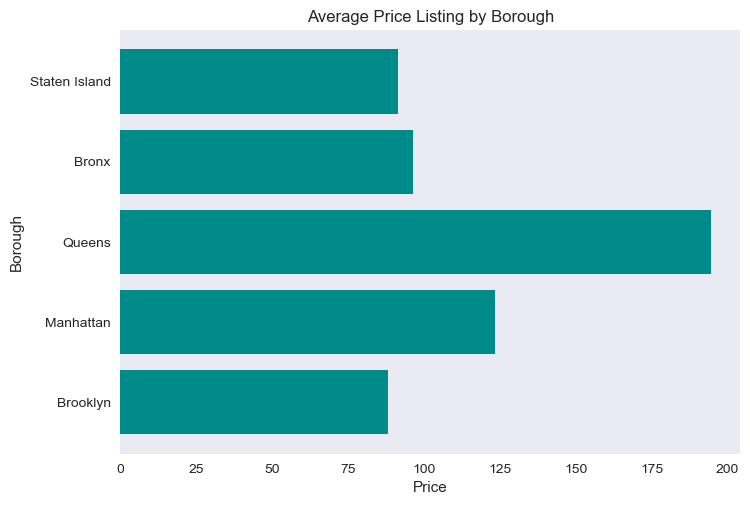

In [186]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.grid(False)
x = df['borough'].unique()
h = df.groupby('borough').mean()['price']
c = ["darkcyan"]
plt.barh(x,h,height=0.8,color=c)
plt.xlabel("Price")
plt.ylabel("Borough")
plt.title("Average Price Listing by Borough")
plt.show

### What is the average availability in days of listings by borough? Visualize your results with a bar plot!




<function matplotlib.pyplot.show(close=None, block=None)>

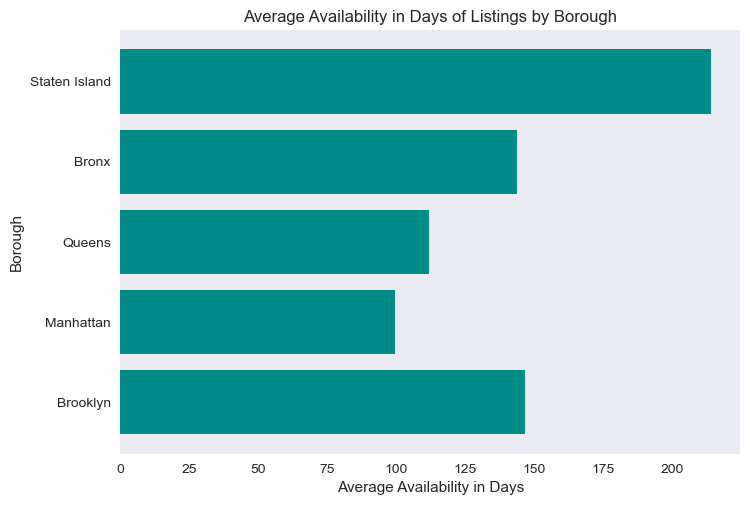

In [188]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.grid(False)
x = df['borough'].unique()
h = df.groupby('borough').mean()['availability_365']
c = ["darkcyan"]
plt.barh(x,h,height=0.8,color=c)
plt.xlabel("Average Availability in Days")
plt.ylabel("Borough")
plt.title("Average Availability in Days of Listings by Borough")
plt.show

### What is the median price per room type in each borough? Visualize your results with a bar plot!




In [213]:
# Create a New Data Frame based on Aggregation and Reset the Index
df2 = df.groupby(['borough','room_type']).median()['price'].reset_index()
df2

,borough,room_type,price
0,Bronx,Entire place,99.0
1,Bronx,Private Room,55.0
2,Bronx,Shared room,31.5
3,Bronx,home,60.5
4,Brooklyn,Entire place,147.0
5,Brooklyn,Private Room,65.0
6,Brooklyn,Shared room,38.0
7,Brooklyn,home,149.5
8,Manhattan,Entire place,195.0
9,Manhattan,Private Room,88.0


<function matplotlib.pyplot.show(close=None, block=None)>

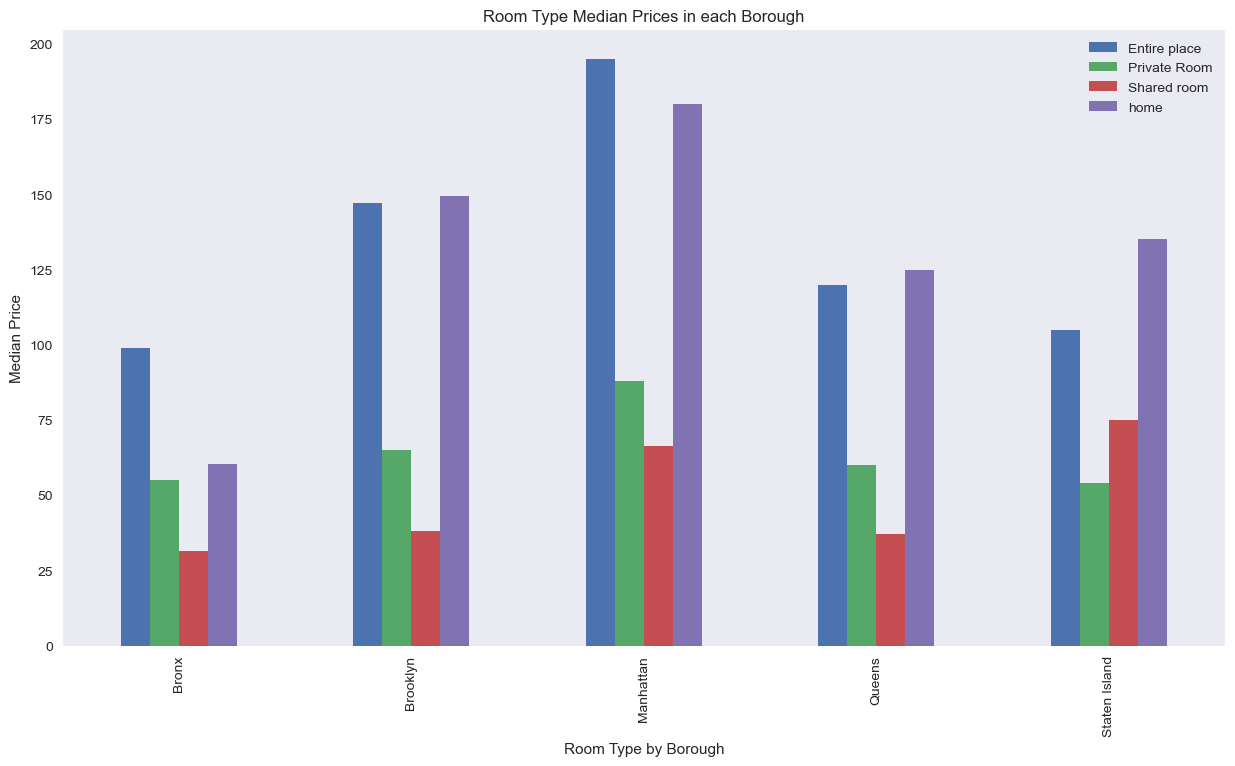

In [236]:
# Create a Pivot from 2-Column Aggregations
df2.pivot(index='borough',columns='room_type',values='price').plot(kind='bar',figsize=(15,8))
plt.style.use('seaborn')
plt.grid(False)
plt.xlabel('Room Type by Borough')
plt.ylabel('Median Price')
plt.title('Room Type Median Prices in each Borough')
plt.legend(loc='upper right')
plt.show

In [241]:
plt.figure(figsize=(15,8))
sns.lineplot(x='listing_added',y='Sales',data=df)
plt.show()

listing_id                             int64
name                                  object
host_id                                int64
host_name                             object
coordinates                           object
room_type                             object
price                                float64
number_of_reviews                      int64
last_review                   datetime64[ns]
reviews_per_month                    float64
availability_365                       int64
rating                               float64
number_of_stays                      float64
5_stars                              float64
listing_added                 datetime64[ns]
neighbourhood_full_borough              bool
borough                               object
neighbourhood                         object
dtype: object

### Visualize the number of listings over time.




In [292]:
# Add a new column in the data frame to get the year from listing_added field
df['year'] = df['listing_added'].dt.year
df['month'] = df['listing_added'].dt.month_name()

df.head(10)

,listing_id,name,host_id,host_name,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,neighbourhood_full_borough,borough,neighbourhood,year,month
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"(40.63222, -73.93398)",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,False,Brooklyn,Flatlands,2018,June
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"(40.78761, -73.96862)",Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,False,Manhattan,Upper West Side,2018,December
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"(40.7007, -73.99517)",Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,False,Brooklyn,Brooklyn Heights,2018,August
3,6425850,"Spacious, charming studio",32715865,Yelena,"(40.79169, -73.97498)",Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,False,Manhattan,Upper West Side,2017,March
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"(40.71884, -73.98354)",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,False,Manhattan,Lower East Side,2020,October
5,271954,Beautiful brownstone apartment,1423798,Aj,"(40.73388, -73.99452)",Entire place,150.0,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,False,Manhattan,Greenwich Village,2018,December
6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,"(40.8309, -73.94308000000002)",Entire place,200.0,0,NaT,NaN,219,NaN,NaN,NaN,2018-05-05,False,Manhattan,Harlem,2018,May
7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,"(40.58531, -73.93811)",Entire place,224.0,2,2018-06-22,0.08,353,4.091228,2.4,0.690393,2017-12-17,False,Brooklyn,Sheepshead Bay,2017,December
8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,"(40.761, -73.98522)",Entire place,169.0,5,2017-06-25,0.15,365,3.562947,6.0,0.704538,2016-12-20,False,Manhattan,Theater District,2016,December
9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,"(40.80667, -73.95182)",Entire place,75.0,8,2019-04-24,0.66,9,4.695769,9.6,0.750073,2018-10-19,False,Manhattan,Harlem,2018,October


In [348]:
# Create a New Data Frame based on Aggregation and Reset the Index
df3 = df.groupby(['month','year']).count()['listing_id'].reset_index()
df3 =df3.sort_values(['year',
                     'month'])
df3

,month,year,listing_id
56,November,2010,1
70,September,2010,1
12,December,2011,2
32,July,2012,1
62,October,2012,3
...,...,...,...
77,September,2018,435
31,January,2019,171
11,August,2020,1
25,February,2020,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Count of Listings'),
 Text(0.5, 1.0, 'Number of Listings over Time')]

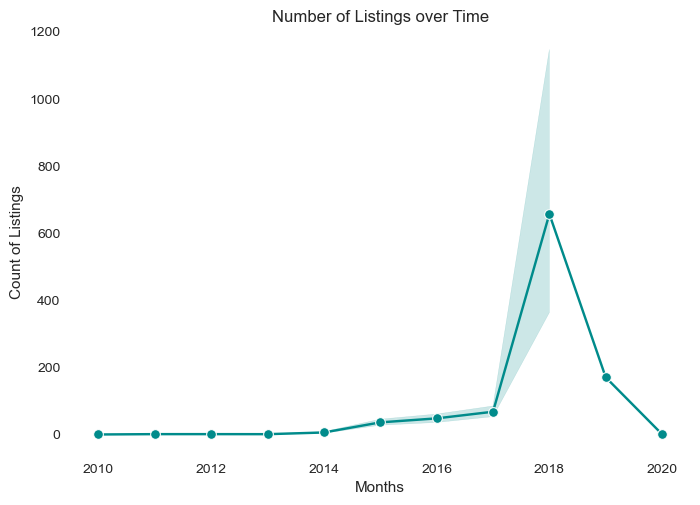

In [358]:
import seaborn as sns
x = df3['year']
y = df3['listing_id']
p1 = sns.lineplot(x,
             y,
             legend='full',
             marker='o',
            color='darkcyan')
p1.set(xlabel="Months",ylabel="Count of Listings",title="Number of Listings over Time")

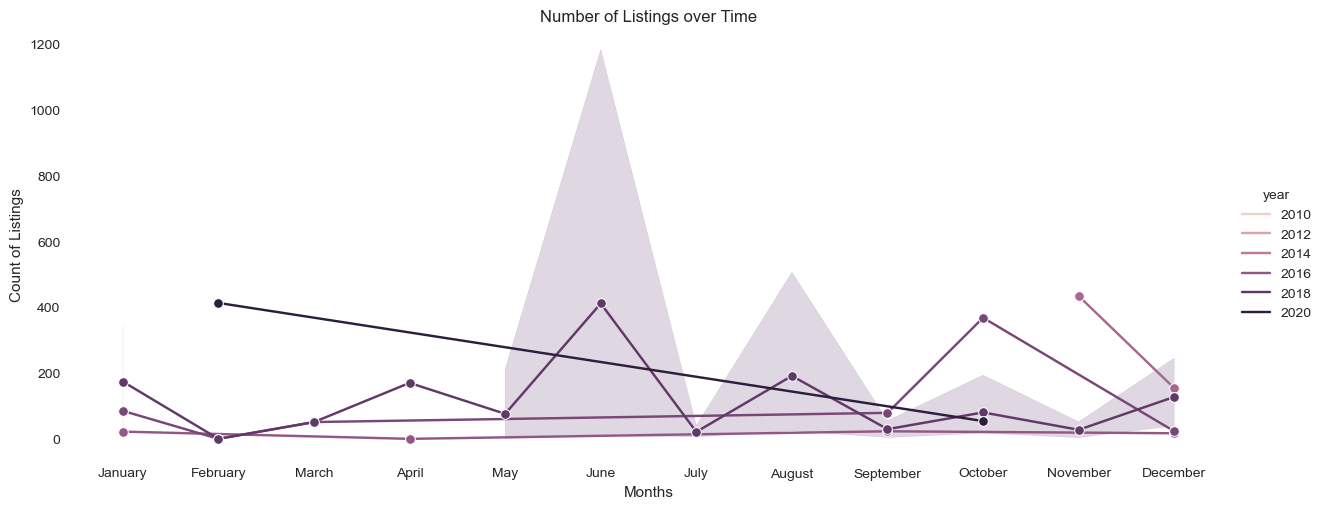

In [346]:
import pandas as pd
import seaborn as sns
from calendar import month_name as mn

# month list
months = mn[1:]

# convert the column to categorical and ordered
Month_Order = pd.Categorical(df['month'], categories=months, ordered=True)

# plot the data
p = sns.relplot(kind='line', x=Month_Order, y=df3['listing_id'], hue=df['year'], aspect=2.5, marker='o',dashes=True)
sns.set_style("ticks", {'axes.grid' : False})
p.set(xlabel="Months",ylabel="Count of Listings",title="Number of Listings over Time")